<h1><b> Reinforcement Learning (RL) </b></h1>

References
- https://www.geeksforgeeks.org/deep-q-learning/?ref=lbp
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-q-learning
- https://amunategui.github.io/reinforcement-learning/index.html

<h3><b> <i> Q-Learning </i> </b></h3>

In [2]:
!pip install networkx

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 435.7 kB/s eta 0:00:04
    --------------------------------------- 0.0/1.6 MB 435.7 kB/s eta 0:00:04
    --------------------------------------- 0.0/1.6 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.6 MB 252.2 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.6 MB 409.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.6 MB 409.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.6 MB 327.4 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1.6 MB 419.0 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.6 MB 514.3 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.6 MB 567.7 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.6 MB 578.5 kB/s eta 0:00:03
   -


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pylab as plt
import networkx as nx

In [2]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

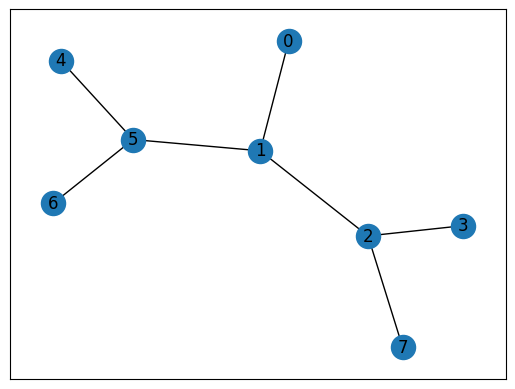

In [3]:
goal = 7
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [4]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [5]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    # For goal path.
    if point[1] == goal:
        R[point] = 100
    # For vaiable path.
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0
    print(R)

(0, 1)
[[-1.  0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
(1, 5)
[[-1.  0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1.  0. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  0. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
(5, 6)
[[-1.  0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1.  0. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  0. -1. -1. -1. -1.  0. -1.]
 [-1. -1. -1. -1. -1.  0. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
(5, 4)
[[-1.  0. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1. -1.  0. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1

In [6]:
# add goal point round trip
R[goal,goal]= 100
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [7]:
# Q-learning matrix which will hold all the lessons learned.
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

In [8]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [9]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [10]:
def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

In [11]:
available_act = available_actions(initial_state) 
print(available_act)

[0 2 5]


In [12]:
action = sample_next_action(available_act)
print(action)

0


In [13]:
update(initial_state, action, gamma)

max_value 0.0


0

In [14]:
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [16]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 180.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 115.2
Score: 379.55555555555554
max_value 0.0
Score: 379.55555555555554
max_value 0.0
Score: 379.55555555555554
max_value 215.2
Score: 371.003717472119
max_value 0.0
Score: 371.003717472119
max_value 0.0
Score: 371.003717472119
max_value 0.0
Score: 371.003717472119
max_value 0.0
Score: 371.003717472119
max_value 144.0
Score: 437.9182156133829
max_value 144.0
Score: 437.9182156133829
max_value 115.2
Score: 491.44

In [17]:
Q

matrix([[  0.        , 319.99791882,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [255.99674816,   0.        , 399.99739853,   0.        ,
           0.        , 255.99833506,   0.        ,   0.        ],
        [  0.        , 319.9959352 ,   0.        , 319.96214359,
           0.        ,   0.        ,   0.        , 499.99674816],
        [  0.        ,   0.        , 399.994919  ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        , 255.99833506,   0.        ,   0.        ],
        [  0.        , 319.99791882,   0.        ,   0.        ,
         204.79739853,   0.        , 204.79739853,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        , 255.99833506,   0.        ,   0.        ],
        [  0.        ,   0.        , 399.99739853,   0.        ,
           0.     

In [18]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


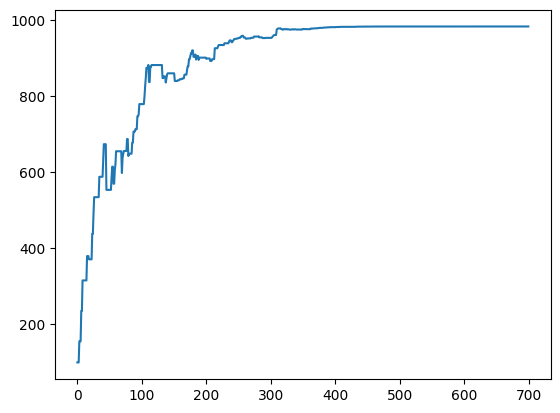

In [19]:
plt.plot(scores)
plt.show()

In [20]:
# Testing with a different value
current_state = 5
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[5, 1, 2, 7]


<i>Version 2.0, with Environmental Details</i>

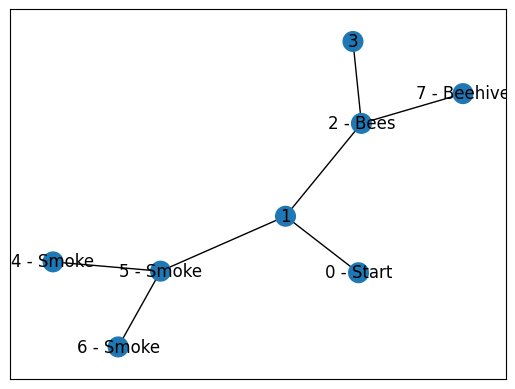

In [21]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'0 - Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [22]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

In [23]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)

In [24]:
def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  environment = collect_environmental_data(action)
  if 'b' in environment: 
    enviro_bees[current_state, action] += 1
  
  if 's' in environment: 
    enviro_smoke[current_state, action] += 1
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

In [25]:
available_act = available_actions(initial_state)
available_act

array([0, 2, 5], dtype=int64)

In [26]:
action = sample_next_action(available_act)
action

0

In [27]:
update(initial_state,action,gamma)
Q

max_value 0.0


matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
enviro_bees

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
enviro_smoke

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 80.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 64.0
max_value 80.0
max_value 64.0
max_value 64.0
max_value 64.0
max_value 0.0
max_value 0.0
max_value 244.0
max_value 244.0
max_value 244.0
max_value 51.2
max_value 0.0
max_value 195.20000000000002
max_value 0.0
max_value 0.0
max_value 195.20000000000002
max_value 195.20000000000002
max_value 64.0
max_value 0.0
max_value 0.0
max_value 195.20000000000002
max_value 195.20000000000002
max_value 195.20000000000002
max_value 195.20000000000002
max_value 0.0
max_value 51.2
max_value 195.20000000000002
max_value 0.0
max_value 195.20000000000002
max_value 156.16000000000003
max_value 0.0
max_value 0.0


In [31]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)
enviro_matrix

matrix([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  34.,   0.,   0., -25.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  92.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., -72.,   0.,   0.],
        [  0.,   0.,   0.,   0., -25.,   0., -34.,   0.],
        [  0.,   0.,   0.,   0.,   0., -76.,   0.,   0.],
        [  0.,   0.,  58.,   0.,   0.,   0.,   0.,   0.]])

In [32]:
# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

In [33]:
update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

max_value 0.0


C:\Users\User\AppData\Local\Temp\ipykernel_27536\2107626513.py:22: RuntimeWarning: invalid value encountered in divide
  return(np.sum(Q/np.max(Q)*100))


In [34]:
def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

In [35]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [0 2 5]
to: [0 2]


C:\Users\User\AppData\Local\Temp\ipykernel_27536\2107626513.py:22: RuntimeWarning: invalid value encountered in divide
  return(np.sum(Q/np.max(Q)*100))


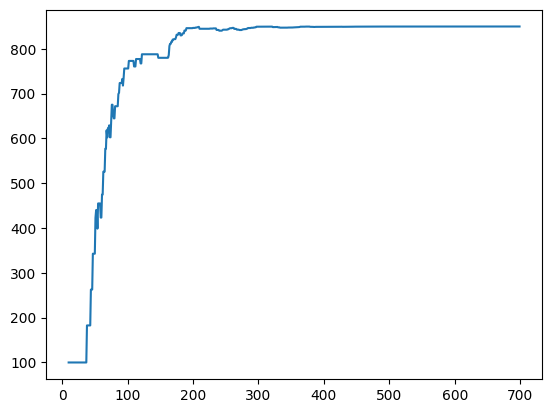

In [36]:
plt.plot(scores)
plt.show()